# Twitter Sentiment Analysis - Modeling
Author: Brenda De Leon

We will iteratively perform and evaluate preprocessing and feature engineering techniques and will evaluate a final model on the test set.
#### Libraries

In [79]:
# importing relevant libraries
# !pip install wordcloud
# !pip install nltk
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import random # generating random numbers
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

import re
import string
from PIL import Image # for opening, manipulating, and saving many different image file f
from textwrap import wrap
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.inspection import permutation_importance
from matplotlib import cm
from nltk import FreqDist, pos_tag 
from nltk.tokenize import RegexpTokenizer, TweetTokenizer, word_tokenize
from nltk.corpus import stopwords, wordnet
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, plot_roc_curve,\
f1_score, accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brendadeleon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brendadeleon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brendadeleon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/brendadeleon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Data
We will import in our updated dataframe and make sure it is prepared for modeling. 

In [28]:
# importing data
df = pd.read_csv('data/clean_df.csv')
# previewing data
df.head()

,level_0,index,Tweet,Brand_or_Product,Sentiment,target,clean_tweets,preprocessed_tweets,brand,brand_sorted,...,capital_char_count,capital_word_count,punct_count,sent_count,unique_word_count,stopword_count,avg_wordlength,avg_sentlength,unique_vs_words,stopwords_vs_words
0,0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Negative,i have a 3g iphone after 3 hrs tweeting at it ...,wesley g iphone hr tweet rise austin dead need...,Apple,Apple,...,15,4,"{'! count': 1, '"" count': 0, '# count': 2, '$ ...",5,21,7,5.521739,4.600000,0.913043,0.304348
1,1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Positive,know about awesome ipad iphone app that you'll...,jessedee know fludapp awesome ipad iphone app ...,Apple,Apple,...,10,1,"{'! count': 0, '"" count': 0, '# count': 1, '$ ...",3,22,7,6.318182,7.333333,1.000000,0.318182
2,2,2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Positive,can not wait for 2 also they should sale them ...,swonderlin wait ipad also sale sxsw,Apple,Apple,...,7,1,"{'! count': 0, '"" count': 0, '# count': 2, '$ ...",2,15,6,5.266667,7.500000,1.000000,0.400000
3,3,3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Negative,i hope this year's festival isn't as crashy as...,sxsw hope year festival crashy year iphone app...,Apple,Apple,...,2,1,"{'! count': 0, '"" count': 0, '# count': 1, '$ ...",2,12,5,5.466667,7.500000,0.800000,0.333333
4,4,4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Positive,great stuff on fri marissa mayer google tim o'...,sxtxstate great stuff fri sxsw marissa mayer g...,Google,Google,...,14,1,"{'! count': 0, '"" count': 0, '# count': 1, '$ ...",1,17,1,7.705882,17.000000,1.000000,0.058824


In [29]:
# confirming columns, dtypes, nulls, data size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7924 entries, 0 to 7923
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   level_0              7924 non-null   int64  
 1   index                7924 non-null   int64  
 2   Tweet                7924 non-null   object 
 3   Brand_or_Product     7924 non-null   object 
 4   Sentiment            7924 non-null   object 
 5   target               7924 non-null   object 
 6   clean_tweets         7923 non-null   object 
 7   preprocessed_tweets  7924 non-null   object 
 8   brand                7924 non-null   object 
 9   brand_sorted         7924 non-null   object 
 10  hashtags             7919 non-null   object 
 11  htag_count           7924 non-null   int64  
 12  mentions             4264 non-null   object 
 13  mention_count        7924 non-null   int64  
 14  char_count           7924 non-null   int64  
 15  word_count           7924 non-null   i

In [30]:
# dropping single null in tweet column
df.dropna(subset=['clean_tweets'], inplace = True)

In [31]:
# dropping five nulls in hashtags column
df.dropna(subset=['hashtags'], inplace = True)

In [32]:
df['mentions'].fillna(value='none', inplace=True)
print(df['mentions'].isnull().sum())

0


### Target

In [33]:
# confirming target value distribution
df['target'].value_counts(dropna=False, normalize=True)

Neutral     0.572240
Positive    0.359055
Negative    0.068704
Name: target, dtype: float64

<b>Our problem:</b> We have a multiclass imbalanced classification problem involving three classes: a neutral case with the majority, a positive case with a significant number of tweets, and a negative case with the minority.

### Train, Test, Split

We are isolating our target as "y" while mapping a numerical value to each label and defining our X to include the cleaned tweets and additonal engineered features. We will then split our data into train and test sets to keep some data unseen for validation testing.

In [51]:
# defining X, y variables
X = df[['clean_tweets', 'brand', 'brand_sorted',
       'hashtags', 'htag_count', 'mentions', 'mention_count', 'char_count',
       'word_count', 'capital_char_count', 'capital_word_count', 'punct_count',
       'sent_count', 'unique_word_count',
       'stopword_count', 'avg_wordlength', 'avg_sentlength', 'unique_vs_words',
       'stopwords_vs_words']]

y = df['target'].map({'Negative': -1, 'Neutral': 0, 'Positive': 1})

In [52]:
# checking for X shape and nulls
print(X.shape)
print(X.isnull().sum())
print('---------------')
# checking for y shape and nulls 
print(y.shape)
print(y.isnull().sum())

(7918, 19)
clean_tweets          0
brand                 0
brand_sorted          0
hashtags              0
htag_count            0
mentions              0
mention_count         0
char_count            0
word_count            0
capital_char_count    0
capital_word_count    0
punct_count           0
sent_count            0
unique_word_count     0
stopword_count        0
avg_wordlength        0
avg_sentlength        0
unique_vs_words       0
stopwords_vs_words    0
dtype: int64
---------------
(7918,)
0


In [53]:
# train test split, setting random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)

###  Classification Metric

The <b>macro F1 score</b> was the metric used to evaluate model performance. [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) 

The F1 score is a popular metric for evaluating the performance of a classification model. The F1 score provides a comprehensive understanding of the models performance since it considers both the precision and recall of the model. 

The macro f1 score in particular is computed using the unweighted mean of the fl scores of each class. This avoids assigning greater contribution to our majority class (neutral sentiment). Since we are working with an imbalanced dataset where all classes are equally important, the macro f1 score is an appropriate metric as the unweighted average.

The selection of F1 macro score as the most appropriate classification metric was informed by data exploration and the business problem itself. It is important for Google that this model does not falsely identify tweets as either positive or negative so we will use F1 score to measure model performance while alos paying attention to the accuracy score. <b>The focus of the F1 score on both the Precison and Recall made it an effective metric for our imbalanced multiclass classification problem.</b>

### Evaluation Function
We are creating a function to evaluate the models on both train and test. By creating a function we will automate the process of evaluating model performance on train and test.
##### Evaluation Function: Scoring Metrics

Our evaluation function will return Classification Reports for both the training and test sets that provide the following commonly used metrics:
 - Precision = True Positives / (True Positives + False Positives)
> Ability of the classifier not to label as positive a sample that is negative.
 - Recall = True Positives / (True Positives + False Negatives)
> Ability of the classifier to find all the positive samples.
 - F1 score = harmonic mean of the Precision and Recall
> Popular metric for imbalanced classification, seeks to equally address precision and recall concerns.
> Because our problem is multiclass the classification report will return the F1 score of each label. 
> <b> We are focusing on the F1 macro, here it is listed as the macro avg under the F1 column. </b>
 - Accuracy = True Positives / Total Predictions
> The fraction of correct predictions.

##### Evaluation Function: Display Figures
 - The function returns a Confusion Matrix for both the training and test sets.
> Confusion matrix provides insight into which classes are being predicted correctly, which incorrectly, and what type of errors are being made. [(Brownlee, 2020)](https://machinelearningmastery.com/confusion-matrix-machine-learning/)

In [138]:
# defining an evaluation classification function for automation and evaluating
def evaluate_classification(model, X_train, X_test, y_train, y_test, classes=None, 
                            cmap='Blues', label=''):
    """Input a model, training data and test data to return sklearn metrics
    - Classification Report for training and test
    - Confusion Matrix for training and test

    Args:
    model: instantiated classifier (ex: LogisticRegression = log_reg)
    X_train: train_test_split & preprocessed
    X_test: train_test_split
    y_train: train_test_split & preprocessed
    y_test: train_test_split
    label: optional label for type of classifier"""
                            
    # retrieve predictions for train and test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # setting display labels for classification report and confusion matrix
    display_labels = ['Negative', 'Neutral', 'Positive']

    # print train classification report
    header = label + " CLASSIFICATION REPORT TRAINING "
    dashes = "---" * 20
    print(dashes, header, dashes, sep='\n')
    print(classification_report(y_train, y_pred_train, target_names=display_labels))    
    # creating train display figure
    fig, axes = plt.subplots(figsize=(6,6))
    # plot confusion matrix
    plot_confusion_matrix(model, X_train, y_train, labels=classes,
                          cmap=cmap, ax=axes, display_labels=display_labels)
    axes.set(title='Confusion Matrix Training')
    plt.show()
    
    # print test classification report
    header_ = label + " CLASSIFICATION REPORT TESTING "
    print(dashes, header_, dashes, sep='\n')
    print(classification_report(y_test, y_pred_test, target_names=display_labels))  
    # creating test display figure
    fig, axes = plt.subplots(figsize=(6,6))
    # plot confusion matrix
    plot_confusion_matrix(model, X_test, y_test, labels=classes, 
                          cmap=cmap, ax=axes, display_labels=display_labels)
    axes.set(title='Confusion Matrix Testing')
    plt.show();

## Model Building

We will iteratively perform and evaluate preprocessing and feature engineering techniques. We will investigate different techniques to determine whether they should be part of our final modeling process. The Dummy Classifier will serve as our simple baseline to compare against other more complex classifiers. We use three different algorithms:

    Logistic Regression
    Multinomial Naive Bayes
    Random Forest

The idea behind choosing these models is that we want to try classifiers ranging from simple ones to complex models to find the one that performs best among them. Our machine learning pipeline will also include using Term Frequency - Inverse Document Frequency (TF-IDF). The performance of these models will be evaluated using macro F1 and accuracy scores. 

### Simple Baseline
We will use the "most frequent" strategy to generate predictions. The 'predict' method will return the most frequent class label of the target.

In [139]:
# creating baseline model and setting prediction strategy to most frequent
estimator = DummyClassifier(strategy='most_frequent')
# fitting to train data
estimator.fit(X_train['clean_tweets'], y_train)

DummyClassifier(strategy='most_frequent')

------------------------------------------------------------
Simple Baseline CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       396
     Neutral       0.57      1.00      0.73      3405
    Positive       0.00      0.00      0.00      2137

    accuracy                           0.57      5938
   macro avg       0.19      0.33      0.24      5938
weighted avg       0.33      0.57      0.42      5938



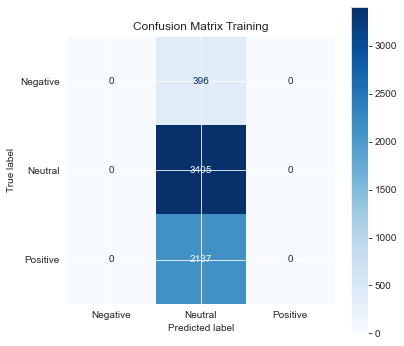

------------------------------------------------------------
Simple Baseline CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       148
     Neutral       0.57      1.00      0.73      1126
    Positive       0.00      0.00      0.00       706

    accuracy                           0.57      1980
   macro avg       0.19      0.33      0.24      1980
weighted avg       0.32      0.57      0.41      1980



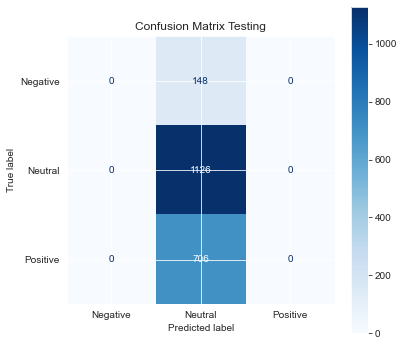

In [140]:
# classification report using function 
evaluate_classification(estimator,
                        X_train['clean_tweets'], 
                        X_test['clean_tweets'], 
                        y_train, 
                        y_test, 
                        label='Simple Baseline');

<b>Notes:</b> The dummy model predicts 'Neutral' for all and has an accuracy of 57%, matching the precentage of distribution of 'Neutral' and an f1 macro of 24%. Both scores are poor.

<b>Next:</b> We will add more preprocessing steps such as removing a more comprehensive stop word list, lemmatizing, and vectorizing. We will then see how these changes perform on more complex models that are commonly used with natural language processing. 

### More preprocessing

#### Additional preprocessing steps
 - Remove additional stopwords
 - Lemmatize
 - Vectorize

In [4]:
# bring in english stopwords
sw_list = stopwords.words('english')
# adding additional words to stopwords_list
sw_list += list(string.punctuation)
sw_list += ["''", '""', "...", 'e``', '"', '"', '#sxsw', '@sxsw', 'sxsw', 'says', '-', 'com', '@mention', 'mention', 'rt', '{link}', 'link', 'i', 'w/', '&amp;', '&amp','amp;', 'amp', "'ll", "'s", "n't", 'get', "'re", 'sxsw.', 'sxswi', 'quot', 'http', '//bit.ly/ieavob', '//j.mp/grn7pk', 'also', '//bit.ly/', "'m", 'via', "'ve", '//t.co/', 'v', '//bit.ly', '���', 'go', 'one', 'got', 'get', 'doe', 'ha', 'wa']

In [15]:
# function to turn series to dataframe
def series_to_dataframe(series):
    return pd.DataFrame(series)

# Function Transformer
series_FT = FunctionTransformer(series_to_dataframe)

In [16]:
# defining a function to lemmatize 
def lemmatize(tweet):
    # split tweet
    tweet_split = tweet.split()
    
    # tokenize and lemmatize
    lem = WordNetLemmatizer()
    tweet_token = [lem.lemmatize(word) for word in tweet_split]
    return tweet_token

Ultimately all data must be in numeric form in order to be able to fit a scikit-learn model. We will vectorize the tweet text data. We are passing our lemmatize function as the tokenizer and our updated stop words list as parameters of the vectorizer. We one hot encode the remaining text (categorical) data. The parameters were selected after testing multiple variations of the parameters.

In [174]:
# creating a vectorizer for the tweet data. 
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=3,
                        ngram_range=(1, 3), max_features=5000,
                        stop_words=sw_list, tokenizer=lemmatize)

In [17]:
# instantiating the one hot encoder
ohe = OneHotEncoder(handle_unknown='ignore')

#### Subpipelines

These subpipelines will become part of the model pipeline through a column transformer.

In [18]:
# pipeline to one hot encode dataframe
ohe_pipe = Pipeline(steps=[
    ('to_df', series_FT),
    ('ohe', ohe),
    ("toarray", FunctionTransformer(lambda x: x.toarray())),
])

# pipeline for vectorizing
vector_pipe = Pipeline(steps=[
    ("squeeze", FunctionTransformer(lambda x: x.squeeze())),
    ('vector', tfidf),
    ("toarray", FunctionTransformer(lambda x: x.toarray())),
])

#### Column Transformer

The column transformer will become a step in the model pipeline. It will take care of the preprocessing steps and prevent data leakage. 

In [170]:
# pipeline for tfidf and one hot encoder
CT = ColumnTransformer(transformers=[
    ('vector_pipe', vector_pipe, ['clean_tweets']),
    ('ohe_pipe', ohe_pipe, make_column_selector(dtype_exclude=np.number))
], remainder='passthrough')

### Logistic Regression
Logistic regression does not support imbalanced classification directly.[(Brownlee, 2020)](https://machinelearningmastery.com/cost-sensitive-logistic-regression/) We will test different parameters to modify the logistic regression algorithm to fit our dataset. 

In [44]:
# logreg pipeline
pipe = Pipeline(steps=[
    ('ct', CT),
    ('estimator', LogisticRegression(random_state=42))
])

param_grid = {}
param_grid['estimator__C'] = [1000, 100]
param_grid['estimator__solver'] = ['newton-cg', 'lbfgs', 'sag']

In [45]:
grid_search = GridSearchCV(estimator=pipe, 
                           param_grid=param_grid, 
                           # settting cross-validation splitting strategy to repeat stratified k-fold 3 times
                           cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42), 
                           # setting true so train scores along with test scores are returned
                           return_train_score=True, 
                           # setting scoring method to macro f1 score
                           scoring='f1_macro', 
                           # setting to -1 so all cores on our CPU are used to cut down on time it takes to run
                           n_jobs=-1,
                           # setting to 1 will provide us with additional messages about running time 
                           verbose=1,
                           # set for error to be raised to help debug
                           error_score='raise')

<b>We will begin with including only the tweet text as x train and test. Iteratively we will include more features if performance increases.</b>

In [32]:
# Fit models run gridsearch
grid_search.fit(X_train[['clean_tweets']], y_train)

Fitting 30 folds for each of 6 candidates, totalling 180 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             error_score='raise',
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('vector_pipe',
                                                                         Pipeline(steps=[('squeeze',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x7f7c0c90cb80>)),
                                                                                         ('vector',
                                                                                          TfidfVectorizer(max_features=500,
                                                                                                          min_df=2,
                                                                                                          ngram...
                                                                                          OneHotEncoder(handle_unknown='ignore')),
                                                                                         ('toarray',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x7f7c0c90c700>))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f7c0b70c610>)])),
                                       ('estimator', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'estimator__C': [1000, 100],
                         'estimator__solver': ['newton-cg', 'lbfgs', 'sag']},
             return_train_score=True, scoring='f1_macro', verbose=1)

In [33]:
print(f"Best Parameters: {grid_search.best_params_}\n")

Best Parameters: {'estimator__C': 1000, 'estimator__solver': 'lbfgs'}



------------------------------------------------------------
Logistic Regression Best Params CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.99      0.99      0.99       396
     Neutral       0.99      1.00      0.99      3405
    Positive       1.00      0.98      0.99      2137

    accuracy                           0.99      5938
   macro avg       0.99      0.99      0.99      5938
weighted avg       0.99      0.99      0.99      5938



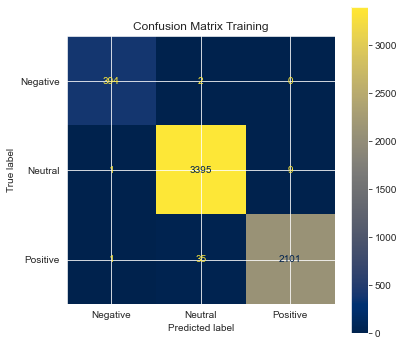

------------------------------------------------------------
Logistic Regression Best Params CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.30      0.07      0.11       148
     Neutral       0.66      0.81      0.73      1126
    Positive       0.59      0.48      0.53       706

    accuracy                           0.64      1980
   macro avg       0.52      0.45      0.46      1980
weighted avg       0.61      0.64      0.61      1980



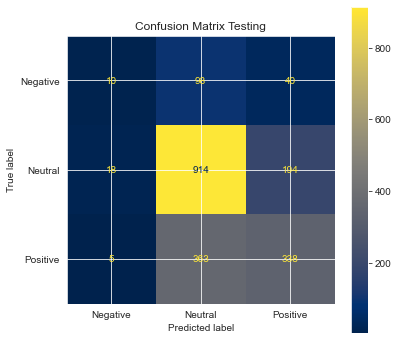

In [34]:
# classification report using function 
evaluate_classification(grid_search,
                        X_train[['clean_tweets']], 
                        X_test[['clean_tweets']], 
                        y_train, 
                        y_test, 
                        label='Logistic Regression Best Params');

<b>Notes:</b> The grid searched logistic regression model has an accuracy of 64%, 7% higher than the baseline and a macro f1 of 46%, 22% higher than the baseline. The macro f1 significantly improved.

<b>Next:</b> We will add a scaler as part of the preprocessing steps in the pipeline. 

#### Adding Scaler as a Preprocessing Step 

In [21]:
# pipeline for scaling
scaler_pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
])

In [22]:
# pipeline for TfIdf and One Hot Encoder
CT = ColumnTransformer(transformers=[
    ('vector_pipe', vector_pipe, ['clean_tweets']),
    ('ohe_pipe', ohe_pipe, make_column_selector(dtype_exclude=np.number)),
    ('scaler_pipe', scaler_pipe, make_column_selector(dtype_include=np.number)),
], remainder='passthrough')

#### Logistic Regression with Scaler 

In [419]:
# logreg pipeline
pipe = Pipeline(steps=[
    ('ct', CT),
    ('estimator', LogisticRegression())
])

param_grid = {}
param_grid['estimator__C'] = [1000, 100]
param_grid['estimator__solver'] = ['newton-cg', 'lbfgs', 'sag']

In [420]:
grid_search = GridSearchCV(estimator=pipe, 
                           param_grid=param_grid, 
                           cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42), 
                           return_train_score=True, 
                           scoring='f1_macro', 
                           n_jobs=-1,
                           verbose=1,
                           error_score='raise')

In [421]:
# Fit models run gridsearch
grid_search.fit(X_train[['clean_tweets']], y_train)

Fitting 30 folds for each of 6 candidates, totalling 180 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             error_score='raise',
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('vector_pipe',
                                                                         Pipeline(steps=[('squeeze',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x7f7bf29c04c0>)),
                                                                                         ('vector',
                                                                                          TfidfVectorizer(max_features=3000,
                                                                                                          min_df=3,
                                                                                                          ngra...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f7a033dc220>),
                                                                        ('scaler_pipe',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f7a033dc340>)])),
                                       ('estimator', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'estimator__C': [1000, 100],
                         'estimator__solver': ['newton-cg', 'lbfgs', 'sag']},
             return_train_score=True, scoring='f1_macro', verbose=1)

In [252]:
print(f"Best Parameters: {grid_search.best_params_}\n")

Best Parameters: {'estimator__C': 1000, 'estimator__solver': 'lbfgs'}



------------------------------------------------------------
Logistic Regression Best Params Scaled CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       1.00      0.99      0.99       396
     Neutral       0.99      0.99      0.99      3405
    Positive       0.99      0.99      0.99      2137

    accuracy                           0.99      5938
   macro avg       0.99      0.99      0.99      5938
weighted avg       0.99      0.99      0.99      5938



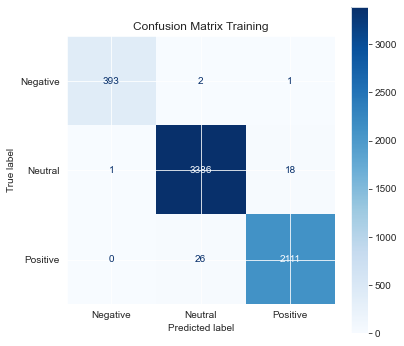

------------------------------------------------------------
Logistic Regression Best Params Scaled CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.50      0.13      0.20       148
     Neutral       0.69      0.81      0.75      1126
    Positive       0.62      0.55      0.58       706

    accuracy                           0.67      1980
   macro avg       0.60      0.50      0.51      1980
weighted avg       0.65      0.67      0.65      1980



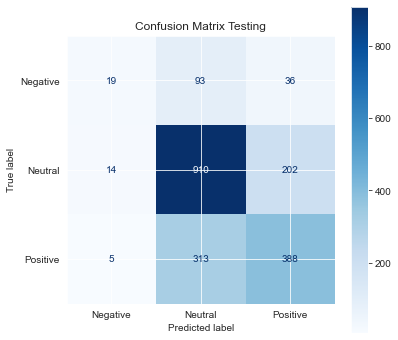

In [422]:
# classification report using function 
evaluate_classification(grid_search,
                        X_train[['clean_tweets']], 
                        X_test[['clean_tweets']], 
                        y_train, 
                        y_test, 
                        label='Logistic Regression Best Params Scaled');

<b>Notes:</b> The grid searched scaled logistic regression model has an accuracy of 67%, 3% higher than the logistic regression model without a scaler and an f1 macro of 51%, 5% higher than the logistic regression model without a scaler. Both scores improved. We will continue to include scaling as part of our pipeline. 

<b>Next:</b> We will repeat the same pipeline, but include an additional feature. We will do another grid search but given that the C parameter has been selected at 1000 we will increase the range, and include a an additional parameter to the gridsearch, different parameters can be different when including the additional engineered features. 

#### Logistic Regression with Engineered Feature

In [426]:
# logreg pipeline
pipe = Pipeline(steps=[
    ('ct', CT),
    ('estimator', LogisticRegression())
])

param_grid = {}
param_grid['estimator__C'] = [3000, 1000]
param_grid['estimator__solver'] = ['lbfgs', 'sag']
param_grid['estimator__max_iter'] = [1000, 3000]

In [427]:
grid_search = GridSearchCV(estimator=pipe, 
                           param_grid=param_grid, 
                           cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42), 
                           return_train_score=True, 
                           scoring='f1_macro', 
                           n_jobs=-1,
                           verbose=1,
                           error_score='raise')

In [428]:
# Fit models run gridsearch
grid_search.fit(X_train[['clean_tweets', 'brand']], y_train)

Fitting 30 folds for each of 8 candidates, totalling 240 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             error_score='raise',
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('vector_pipe',
                                                                         Pipeline(steps=[('squeeze',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x7f7bf29c04c0>)),
                                                                                         ('vector',
                                                                                          TfidfVectorizer(max_features=3000,
                                                                                                          min_df=3,
                                                                                                          ngra...
                                                                        ('scaler_pipe',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f7a033dc340>)])),
                                       ('estimator', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'estimator__C': [3000, 1000],
                         'estimator__max_iter': [1000, 3000],
                         'estimator__solver': ['lbfgs', 'sag']},
             return_train_score=True, scoring='f1_macro', verbose=1)

In [429]:
print(f"Best Parameters: {grid_search.best_params_}\n")

Best Parameters: {'estimator__C': 3000, 'estimator__max_iter': 1000, 'estimator__solver': 'sag'}



------------------------------------------------------------
Logistic Regression Best Params CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       396
     Neutral       1.00      1.00      1.00      3405
    Positive       1.00      1.00      1.00      2137

    accuracy                           1.00      5938
   macro avg       1.00      1.00      1.00      5938
weighted avg       1.00      1.00      1.00      5938



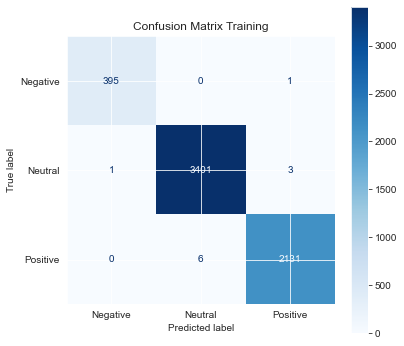

------------------------------------------------------------
Logistic Regression Best Params CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.66      0.20      0.30       148
     Neutral       0.93      0.97      0.95      1126
    Positive       0.82      0.89      0.86       706

    accuracy                           0.88      1980
   macro avg       0.80      0.69      0.70      1980
weighted avg       0.87      0.88      0.87      1980



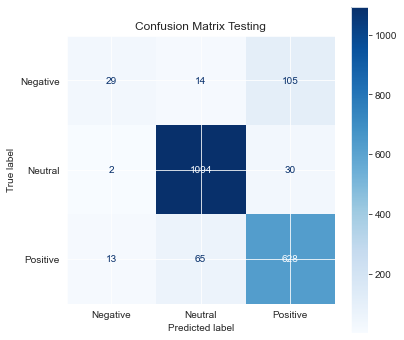

In [430]:
# classification report using function 
evaluate_classification(grid_search,
                        X_train[['clean_tweets', 'brand']], 
                        X_test[['clean_tweets', 'brand']], 
                        y_train, 
                        y_test, 
                        label='Logistic Regression Best Params');

<b>Notes:</b> The logistic regression model with an engineered feature has an accuracy of 88%, about 20% higher than than the previous iteration and an f1 macro of 70%, about 15% higher than the previous iteration. The accuracy and f1 macro significantly improved. We will continue to include the engineered feature and build a model with set parameters for max iter and C.  

<b>Next:</b> We will repeat the same pipeline, but check for class weight. We will see if changing the weigth parameter addresses imbalance issues. 

#### Weighted Logistic Regression

In [141]:
# weighted logreg pipeline
pipe = Pipeline(steps=[
    ('ct', CT),
    ('estimator', LogisticRegression(max_iter=1000,
                                     C=3000,
                                     random_state=42,
                                     class_weight='balanced'))
])

In [142]:
# fit modified model 
pipe.fit(X_train[['clean_tweets', 'brand']], y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vector_pipe',
                                                  Pipeline(steps=[('squeeze',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7fc675fc61f0>)),
                                                                  ('vector',
                                                                   TfidfVectorizer(max_features=5000,
                                                                                   min_df=2,
                                                                                   stop_words=['i',
                                                                                               'me',
                                                                                               'my',
                                                                                               'myself',
                                                                                               'we',
                                                                                               'our',
                                                                                               'ours',
                                                                                               'ourselves',
                                                                                               'you',
                                                                                               "you're",
                                                                                               "you've",
                                                                                               "you'll",
                                                                                               "you'd",
                                                                                               'your',
                                                                                               'y...
                                                                   FunctionTransformer(func=<function <lambda> at 0x7fc6e013d670>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc4c639cf40>),
                                                 ('scaler_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc4c639c5b0>)])),
                ('estimator',
                 LogisticRegression(C=3000, class_weight='balanced',
                                    max_iter=1000, random_state=42))])

------------------------------------------------------------
Logistic Regression Best Params CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.99      1.00      1.00       396
     Neutral       1.00      1.00      1.00      3405
    Positive       1.00      1.00      1.00      2137

    accuracy                           1.00      5938
   macro avg       1.00      1.00      1.00      5938
weighted avg       1.00      1.00      1.00      5938



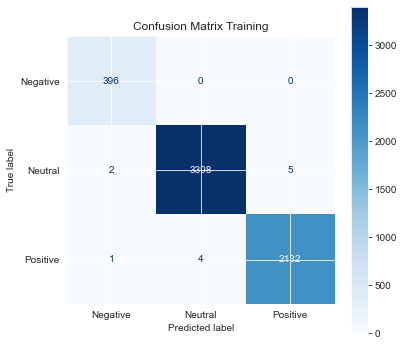

------------------------------------------------------------
Logistic Regression Best Params CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.69      0.25      0.37       148
     Neutral       0.93      0.97      0.95      1126
    Positive       0.84      0.89      0.86       706

    accuracy                           0.89      1980
   macro avg       0.82      0.70      0.73      1980
weighted avg       0.88      0.89      0.88      1980



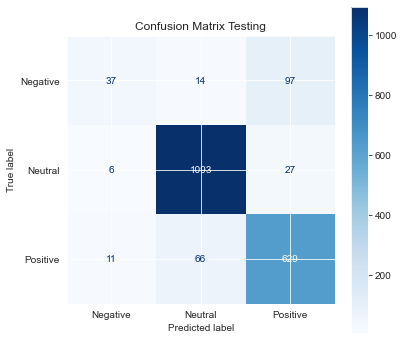

In [143]:
# classification report using function 
evaluate_classification(pipe,
                        X_train[['clean_tweets', 'brand']], 
                        X_test[['clean_tweets', 'brand']], 
                        y_train, 
                        y_test, 
                        label='Logistic Regression Best Params');

<b>Notes:</b> The weighted logistic regression model has an accuracy of 89%, 1% higher than the previous iteration and an f1 macro of 73%, 3% higher than the previous iteration. The accuracy and f1 macro have improved, as of now this is the best performing model. 

<b>Next:</b> We will change the logistic regression solver to see if it imporves our scores.

#### Logistic Regression with sag solver

In [144]:
# sag solver logreg pipeline
pipe = Pipeline(steps=[
    ('ct', CT),
    ('estimator', LogisticRegression(max_iter=1000,
                                     solver='sag',
                                     C=3000,
                                     random_state=42,
                                     class_weight='balanced'))
])

In [145]:
# fit modified model 
pipe.fit(X_train[['clean_tweets', 'brand']], y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vector_pipe',
                                                  Pipeline(steps=[('squeeze',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7fc675fc61f0>)),
                                                                  ('vector',
                                                                   TfidfVectorizer(max_features=5000,
                                                                                   min_df=2,
                                                                                   stop_words=['i',
                                                                                               'me',
                                                                                               'my',
                                                                                               'myself',
                                                                                               'we',
                                                                                               'our',
                                                                                               'ours',
                                                                                               'ourselves',
                                                                                               'you',
                                                                                               "you're",
                                                                                               "you've",
                                                                                               "you'll",
                                                                                               "you'd",
                                                                                               'your',
                                                                                               'y...
                                                                   FunctionTransformer(func=<function <lambda> at 0x7fc6e013d670>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc4c639cf40>),
                                                 ('scaler_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc4c639c5b0>)])),
                ('estimator',
                 LogisticRegression(C=3000, class_weight='balanced',
                                    max_iter=1000, random_state=42,
                                    solver='sag'))])

------------------------------------------------------------
Logistic Regression Best Params CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.99      1.00      1.00       396
     Neutral       1.00      1.00      1.00      3405
    Positive       1.00      1.00      1.00      2137

    accuracy                           1.00      5938
   macro avg       1.00      1.00      1.00      5938
weighted avg       1.00      1.00      1.00      5938



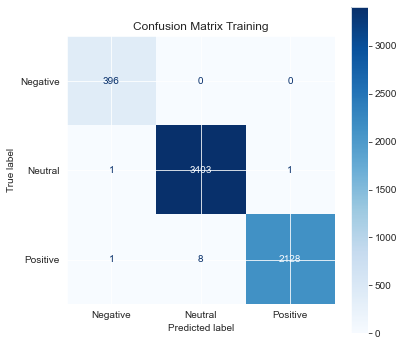

------------------------------------------------------------
Logistic Regression Best Params CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.76      0.24      0.36       148
     Neutral       0.93      0.97      0.95      1126
    Positive       0.83      0.89      0.86       706

    accuracy                           0.89      1980
   macro avg       0.84      0.70      0.72      1980
weighted avg       0.88      0.89      0.87      1980



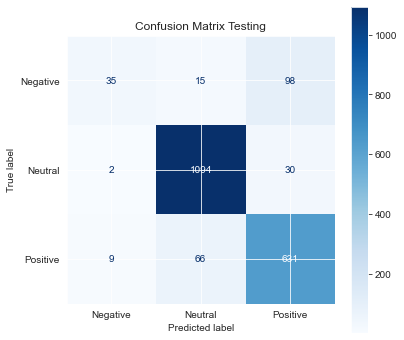

In [146]:
# classification report using function 
evaluate_classification(pipe,
                        X_train[['clean_tweets', 'brand']], 
                        X_test[['clean_tweets', 'brand']], 
                        y_train, 
                        y_test, 
                        label='Logistic Regression Best Params');

<b>Notes:</b> The logistic regression model with a sag solver maintained the same accuracy of 89%, and an f1 macro of 72%, 1% lower than the previous iteration. The accuracy stayed the same and the f1 macro slightly decreased.

<b>Next:</b> We will add all the additional features to the next iteration and again test for best solver.

#### Logistic Regression with all Features 
We will buid a logistic regression pipeline with the best scoring parameters and incude all the engineered features. 

In [153]:
# logreg pipeline
pipe = Pipeline(steps=[
    ('ct', CT),
    ('estimator', LogisticRegression(C=3000, 
                                     solver='sag', 
                                     max_iter=1000, 
                                     class_weight='balanced', 
                                     random_state=42))
]) 

In [154]:
# fit modified model 
pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vector_pipe',
                                                  Pipeline(steps=[('squeeze',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7fc675fc61f0>)),
                                                                  ('vector',
                                                                   TfidfVectorizer(max_features=5000,
                                                                                   min_df=2,
                                                                                   stop_words=['i',
                                                                                               'me',
                                                                                               'my',
                                                                                               'myself',
                                                                                               'we',
                                                                                               'our',
                                                                                               'ours',
                                                                                               'ourselves',
                                                                                               'you',
                                                                                               "you're",
                                                                                               "you've",
                                                                                               "you'll",
                                                                                               "you'd",
                                                                                               'your',
                                                                                               'y...
                                                                   FunctionTransformer(func=<function <lambda> at 0x7fc6e013d670>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc4c639cf40>),
                                                 ('scaler_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc4c639c5b0>)])),
                ('estimator',
                 LogisticRegression(C=3000, class_weight='balanced',
                                    max_iter=1000, random_state=42,
                                    solver='sag'))])

------------------------------------------------------------
Logistic Regression Best Params CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       396
     Neutral       1.00      1.00      1.00      3405
    Positive       1.00      1.00      1.00      2137

    accuracy                           1.00      5938
   macro avg       1.00      1.00      1.00      5938
weighted avg       1.00      1.00      1.00      5938



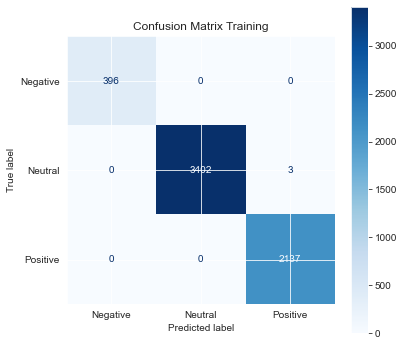

------------------------------------------------------------
Logistic Regression Best Params CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.59      0.29      0.39       148
     Neutral       0.93      0.97      0.95      1126
    Positive       0.84      0.87      0.85       706

    accuracy                           0.88      1980
   macro avg       0.79      0.71      0.73      1980
weighted avg       0.87      0.88      0.87      1980



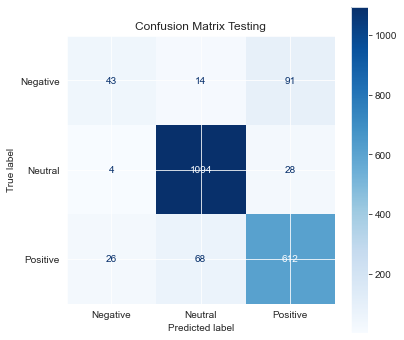

In [155]:
# classification report using function 
evaluate_classification(pipe,
                        X_train, 
                        X_test, 
                        y_train, 
                        y_test, 
                        label='Logistic Regression Best Params');

<b>Notes:</b> The logistic regression model with all features has an accuracy of 88%, 1% lower than the previous iteration and an f1 macro of 73%, like the previous iteration. The sag solver again performed higher.    

<b>Next:</b> We will use a naive bayes model in the pipeline and a gridsearch. 

### Multinomial Naive Bayes
Multinomial Naive Bayes classification is a common algorithm for sentiment analysis tasks. The basic idea of Naive Bayes technique is to find the probabilities of classes(sentiments) assigned to texts(tweets) by using the joint probabilities of words and classes. 

In [399]:
# instantiating naive bayes pipeline
pipe = Pipeline(steps=[
    ('ct', CT),
    ('estimator', MultinomialNB())
])

In [400]:
# creating params dictionary 
param_grid = {}
param_grid['estimator__alpha'] = [0.01, 0.1, 0.5, 1.0, 10.0]

In [401]:
# instantiating modified grid search over paramater dict and selecting fl macro as scoring method 
grid_search = GridSearchCV(estimator=pipe, 
                           param_grid=param_grid, 
                           cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42), 
                           return_train_score=True, 
                           scoring='f1_macro', 
                           n_jobs=-1,
                           verbose=1,
                           error_score='raise')

In [402]:
# fit grid search
grid_search.fit(X_train[['clean_tweets']], y_train)

Fitting 30 folds for each of 5 candidates, totalling 150 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             error_score='raise',
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('vector_pipe',
                                                                         Pipeline(steps=[('squeeze',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x7f7bf29c04c0>)),
                                                                                         ('vector',
                                                                                          TfidfVectorizer(max_features=3000,
                                                                                                          min_df=3,
                                                                                                          ngra...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f7bf35073a0>),
                                                                        ('scaler_pipe',
                                                                         Pipeline(steps=[('scale',
                                                                                          MinMaxScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f7bf3507100>)])),
                                       ('estimator', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'estimator__alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             return_train_score=True, scoring='f1_macro', verbose=1)

In [406]:
print(f"Optimal Parameters: {grid_search.best_params_}\n")

Optimal Parameters: {'estimator__alpha': 0.01}



------------------------------------------------------------
Naive Bayes Best Params CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.97      1.00      0.99       396
     Neutral       0.99      0.99      0.99      3405
    Positive       0.99      0.98      0.99      2137

    accuracy                           0.99      5938
   macro avg       0.99      0.99      0.99      5938
weighted avg       0.99      0.99      0.99      5938



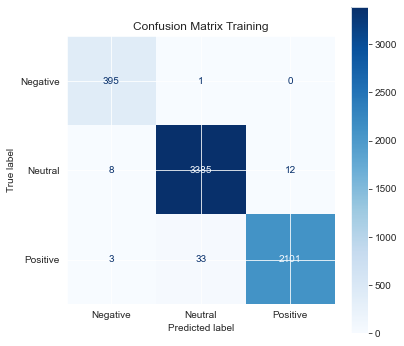

------------------------------------------------------------
Naive Bayes Best Params CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.38      0.14      0.20       148
     Neutral       0.68      0.76      0.72      1126
    Positive       0.58      0.55      0.56       706

    accuracy                           0.64      1980
   macro avg       0.55      0.48      0.49      1980
weighted avg       0.62      0.64      0.62      1980



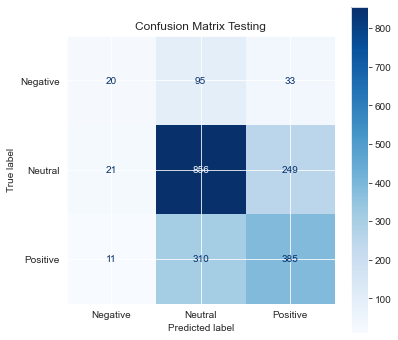

In [410]:
# classification report using function 
evaluate_classification(grid_search,
                        X_train[['clean_tweets']], 
                        X_test[['clean_tweets']], 
                        y_train, 
                        y_test, 
                        label='Naive Bayes Best Params');

<b>Notes:</b> The grid searched naive bayes model has an accuracy of 64%, about 25% lower than the best accuracy score and an f1 macro of 64%, about 8% lower than the best f1 macro score. The accuracy and f1 macro scores decreased. 

<b>Next:</b> We will use a naive bayes model with the previous iteration's best parameters in the pipeline without the gridsearch. We will add all the additional features to see if it increases the performance.

#### Naive Bayes with Engineered Features

In [411]:
# naive bayes pipeline
pipe = Pipeline(steps=[
    ('ct', CT),
    ('estimator', MultinomialNB(alpha=0.01))
])

In [412]:
# fit modified model 
pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vector_pipe',
                                                  Pipeline(steps=[('squeeze',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7f7bf29c04c0>)),
                                                                  ('vector',
                                                                   TfidfVectorizer(max_features=3000,
                                                                                   min_df=3,
                                                                                   ngram_range=(1,
                                                                                                2),
                                                                                   stop_words=['i',
                                                                                               'me',
                                                                                               'my',
                                                                                               'myself',
                                                                                               'we',
                                                                                               'our',
                                                                                               'ours',
                                                                                               'ourselves',
                                                                                               'you',
                                                                                               "you're",
                                                                                               "you've",
                                                                                               "you'll"...
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('toarray',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7f7bf29c0ca0>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7bf35073a0>),
                                                 ('scaler_pipe',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7bf3507100>)])),
                ('estimator', MultinomialNB(alpha=0.01))])

------------------------------------------------------------
Naive Bayes CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99       396
     Neutral       1.00      1.00      1.00      3405
    Positive       1.00      0.99      1.00      2137

    accuracy                           1.00      5938
   macro avg       0.99      1.00      0.99      5938
weighted avg       1.00      1.00      1.00      5938



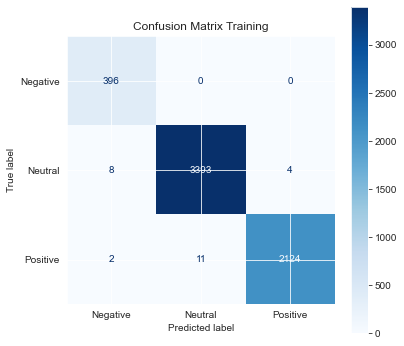

------------------------------------------------------------
Naive Bayes CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.47      0.28      0.35       148
     Neutral       0.88      0.90      0.89      1126
    Positive       0.75      0.80      0.77       706

    accuracy                           0.81      1980
   macro avg       0.70      0.66      0.67      1980
weighted avg       0.80      0.81      0.81      1980



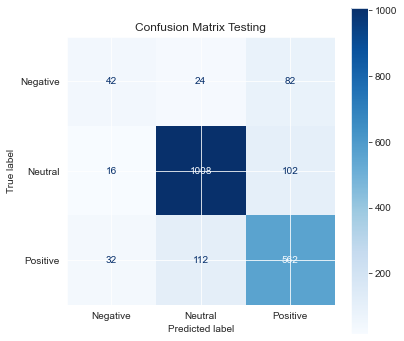

In [413]:
# classification report using function 
evaluate_classification(pipe,
                        X_train, 
                        X_test, 
                        y_train, 
                        y_test, 
                        label='Naive Bayes');

<b>Notes:</b> The naive bayes model has an accuracy of 81%, about 17% higher than the naive bayes model without engineered features and an <b>f1 macro of 67%</b>, about 3% higher than the naive bayes model without engineered features. The accuracy and f1 macro scores decreased. 

<b>Next:</b> We will use a random forest model in the pipeline and a gridsearch. 

### Random Forest
Ensemble classifiers can produce better predictive performace because they combine the predictions of several models.
Random Forest algorithm uses the averaging ensemble method; it builds several independent models and averages their predictions. [(documentation)](https://scikit-learn.org/stable/modules/ensemble.html) 

In [337]:
# random forest pipeline
pipe = Pipeline(steps=[
    ('ct', CT),
    ('estimator', RandomForestClassifier(random_state=42))
])

In [338]:
param_grid = {}

param_grid['estimator__n_estimators'] = [100, 1000] 
param_grid['estimator__max_features'] = ['auto', 'sqrt'] 
                                        # class weights will take imbalance into account
param_grid['estimator__class_weight'] = ['balanced', 'balanced_subsample', None] 


In [339]:
grid_search = GridSearchCV(estimator=pipe, 
                           param_grid=param_grid, 
                           cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42), 
                           return_train_score=True, 
                           scoring='f1_macro', 
                           n_jobs=-1,
                           verbose=1,
                           error_score='raise')

In [340]:
# Fit models run gridsearch
grid_search.fit(X_train[['clean_tweets']], y_train)

Fitting 30 folds for each of 12 candidates, totalling 360 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             error_score='raise',
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('vector_pipe',
                                                                         Pipeline(steps=[('squeeze',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x7f7bf29c04c0>)),
                                                                                         ('vector',
                                                                                          TfidfVectorizer(max_features=3000,
                                                                                                          min_df=3,
                                                                                                          ngra...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f7bf3507100>)])),
                                       ('estimator',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'estimator__class_weight': ['balanced',
                                                     'balanced_subsample',
                                                     None],
                         'estimator__max_features': ['auto', 'sqrt'],
                         'estimator__n_estimators': [100, 1000]},
             return_train_score=True, scoring='f1_macro', verbose=1)

In [342]:
print(f"Best Parameters: {grid_search.best_params_}\n")

Best Parameters: {'estimator__class_weight': None, 'estimator__max_features': 'auto', 'estimator__n_estimators': 1000}



------------------------------------------------------------
Random Forest Best Params CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       1.00      0.99      0.99       396
     Neutral       0.99      1.00      0.99      3405
    Positive       1.00      0.98      0.99      2137

    accuracy                           0.99      5938
   macro avg       0.99      0.99      0.99      5938
weighted avg       0.99      0.99      0.99      5938



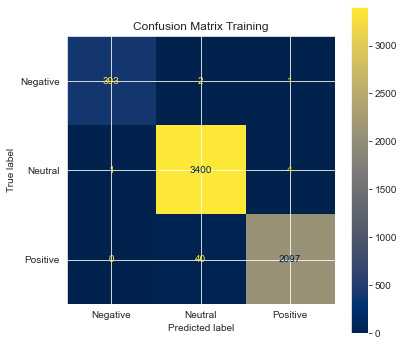

------------------------------------------------------------
Random Forest Best Params CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.57      0.18      0.27       148
     Neutral       0.68      0.84      0.75      1126
    Positive       0.65      0.50      0.56       706

    accuracy                           0.67      1980
   macro avg       0.63      0.51      0.53      1980
weighted avg       0.66      0.67      0.65      1980



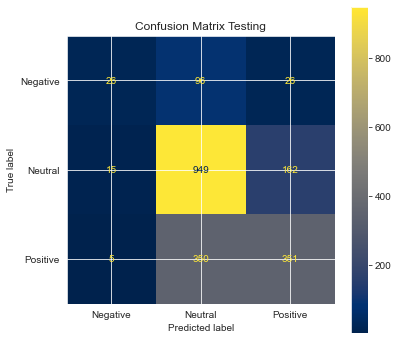

In [341]:
# classification report using function 
evaluate_classification(grid_search,
                        X_train[['clean_tweets']], 
                        X_test[['clean_tweets']], 
                        y_train, 
                        y_test, 
                        label='Random Forest Best Params');

<b>Notes:</b> The grid searched random forest model has an accuracy of 67%, about 20% lower than the best performing model and an f1 macro of 53%, again about 20% lower than the best performing model. The accuracy and f1 macro decreased.   

<b>Next:</b> We will use a random forest model with the previous iteration's best parameters in the pipeline without the gridsearch. We will add all the additional features to see if it increases the performance.

#### Random Forest with Engineered Features

In [70]:
# random forest pipeline
rf_pipe = Pipeline(steps=[
    ('ct', CT),
    ('estimator', RandomForestClassifier(class_weight=None, 
                                         max_features='auto', 
                                         n_estimators = 1000, 
                                         random_state=42))
])

In [71]:
# fit modified model 
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vector_pipe',
                                                  Pipeline(steps=[('squeeze',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7fc61fd68310>)),
                                                                  ('vector',
                                                                   TfidfVectorizer(max_features=3000,
                                                                                   min_df=3,
                                                                                   stop_words=['i',
                                                                                               'me',
                                                                                               'my',
                                                                                               'myself',
                                                                                               'we',
                                                                                               'our',
                                                                                               'ours',
                                                                                               'ourselves',
                                                                                               'you',
                                                                                               "you're",
                                                                                               "you've",
                                                                                               "you'll",
                                                                                               "you'd",
                                                                                               'your',
                                                                                               'y...
                                                                   FunctionTransformer(func=<function <lambda> at 0x7fc6e013d670>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc61fd7a340>),
                                                 ('scaler_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc61fd7aa60>)])),
                ('estimator',
                 RandomForestClassifier(max_features='auto', n_estimators=1000,
                                        random_state=42))])

------------------------------------------------------------
Random Forest Best Params CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       396
     Neutral       1.00      1.00      1.00      3405
    Positive       1.00      1.00      1.00      2137

    accuracy                           1.00      5938
   macro avg       1.00      1.00      1.00      5938
weighted avg       1.00      1.00      1.00      5938



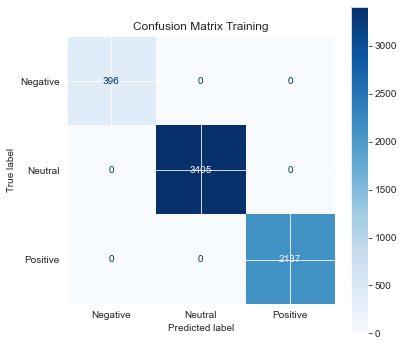

------------------------------------------------------------
Random Forest Best Params CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.87      0.09      0.16       148
     Neutral       0.93      0.97      0.95      1126
    Positive       0.81      0.90      0.85       706

    accuracy                           0.88      1980
   macro avg       0.87      0.65      0.66      1980
weighted avg       0.88      0.88      0.86      1980



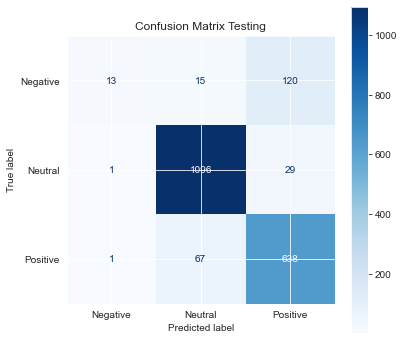

In [72]:
# classification report using function 
evaluate_classification(rf_pipe,
                        X_train, 
                        X_test, 
                        y_train, 
                        y_test, 
                        label='Random Forest Best Params');

<b>Notes:</b> The random forest model has an accuracy of 88%, about 20% better than the random forest model without engineered features and about 1% less than the best accuracy and an f1 macro of 65%, about 10% higher than the random forest model without engineered features and 8% lower than the best f1 macro score. The accuracy and f1 macro are higher but not the best.   

<b>Next:</b> With the best performing overall model we will perform a gridsearch for best vectorizer parameters for the final model.

### Vectorizer Grid Search

We will see if a grid search over some of the vectorizer parameters increases the macro f1 score. 

In [451]:
# pipeline with best performing estimator parameters 
pipe = Pipeline(steps=[
    ('ct', CT),
    ('estimator', LogisticRegression(C=3000, 
                                     solver='sag', 
                                     max_iter=1000, 
                                     class_weight='balanced', 
                                     random_state=42))
])

param_grid = {}
param_grid['ct__vector_pipe__vector__max_features'] = [3000, 5000]
param_grid['ct__vector_pipe__vector__ngram_range'] = [(1,1), (1,2)]
param_grid['ct__vector_pipe__vector__min_df'] = [2, 3]

In [452]:
grid_search = GridSearchCV(estimator=pipe, 
                           param_grid=param_grid, 
                           cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42), 
                           return_train_score=True, 
                           scoring='f1_macro', 
                           n_jobs=-1,
                           verbose=1,
                           error_score='raise')

In [453]:
# fit gridsearch on train data
grid_search.fit(X_train, y_train)

Fitting 30 folds for each of 8 candidates, totalling 240 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             error_score='raise',
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('vector_pipe',
                                                                         Pipeline(steps=[('squeeze',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x7f7bf29c04c0>)),
                                                                                         ('vector',
                                                                                          TfidfVectorizer(max_features=3000,
                                                                                                          min_df=3,
                                                                                                          ngra...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f7a033dc340>)])),
                                       ('estimator',
                                        LogisticRegression(C=3000,
                                                           class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=42,
                                                           solver='sag'))]),
             n_jobs=-1,
             param_grid={'ct__vector_pipe__vector__max_features': [3000, 5000],
                         'ct__vector_pipe__vector__min_df': [2, 3],
                         'ct__vector_pipe__vector__ngram_range': [(1, 1),
                                                                  (1, 2)]},
             return_train_score=True, scoring='f1_macro', verbose=1)

In [454]:
print(f"Best Parameters: {grid_search.best_params_}\n")

Best Parameters: {'ct__vector_pipe__vector__max_features': 5000, 'ct__vector_pipe__vector__min_df': 2, 'ct__vector_pipe__vector__ngram_range': (1, 1)}



------------------------------------------------------------
Logistic Regression CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       396
     Neutral       1.00      1.00      1.00      3405
    Positive       1.00      1.00      1.00      2137

    accuracy                           1.00      5938
   macro avg       1.00      1.00      1.00      5938
weighted avg       1.00      1.00      1.00      5938



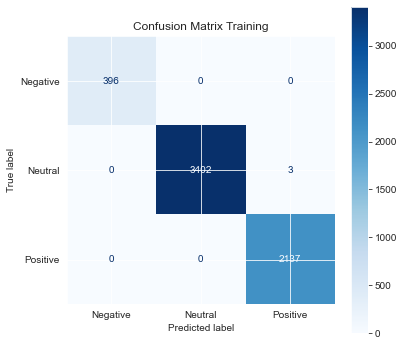

------------------------------------------------------------
Logistic Regression CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.59      0.29      0.39       148
     Neutral       0.93      0.97      0.95      1126
    Positive       0.84      0.87      0.85       706

    accuracy                           0.88      1980
   macro avg       0.79      0.71      0.73      1980
weighted avg       0.87      0.88      0.87      1980



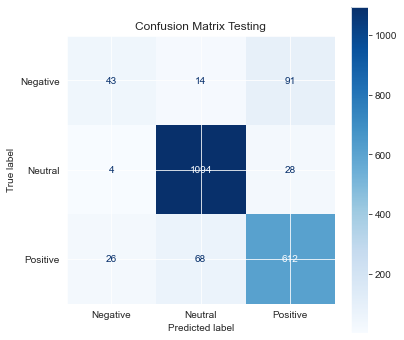

In [455]:
# classification report using function 
evaluate_classification(grid_search,
                        X_train, 
                        X_test, 
                        y_train, 
                        y_test, 
                        label='Logistic Regression');

<b>Notes:</b> The modifications on this model have resulted in the best performance for all features. 

<b>Next:</b> We will move forward with the best parameters of the vectorizer and build the final model without a gridsearch.

# Final Model
We will evaluate the final model on the test set.

In [133]:
final_tfidf = TfidfVectorizer(max_features=5000, 
                        min_df=2, ngram_range=(1, 1),
                        stop_words=sw_list, tokenizer=lemmatize)

In [134]:
# pipeline for vectorizing
vector_pipe = Pipeline(steps=[
    ("squeeze", FunctionTransformer(lambda x: x.squeeze())),
    ('vector', final_tfidf),
    ("toarray", FunctionTransformer(lambda x: x.toarray())),
])

# pipeline for TfIdf and One Hot Encoder
CT = ColumnTransformer(transformers=[
    ('vector_pipe', vector_pipe, ['clean_tweets']),
    ('ohe_pipe', ohe_pipe, make_column_selector(dtype_exclude=np.number)),
    ('scaler_pipe', scaler_pipe, make_column_selector(dtype_include=np.number)),
], remainder='passthrough')

In [135]:
# pipeline with best performing vector and estimator parameters 
final_model = Pipeline(steps=[
    ('ct', CT),
    ('estimator', LogisticRegression(C=3000, 
                                     solver='sag', 
                                     max_iter=1000, 
                                     class_weight='balanced', 
                                     random_state=42))
])

In [136]:
# fit final model 
final_model.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vector_pipe',
                                                  Pipeline(steps=[('squeeze',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7fc675fc61f0>)),
                                                                  ('vector',
                                                                   TfidfVectorizer(max_features=5000,
                                                                                   min_df=2,
                                                                                   stop_words=['i',
                                                                                               'me',
                                                                                               'my',
                                                                                               'myself',
                                                                                               'we',
                                                                                               'our',
                                                                                               'ours',
                                                                                               'ourselves',
                                                                                               'you',
                                                                                               "you're",
                                                                                               "you've",
                                                                                               "you'll",
                                                                                               "you'd",
                                                                                               'your',
                                                                                               'y...
                                                                   FunctionTransformer(func=<function <lambda> at 0x7fc6e013d670>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc4c639cf40>),
                                                 ('scaler_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc4c639c5b0>)])),
                ('estimator',
                 LogisticRegression(C=3000, class_weight='balanced',
                                    max_iter=1000, random_state=42,
                                    solver='sag'))])

------------------------------------------------------------
Logistic Regression(Final Model) CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       396
     Neutral       1.00      1.00      1.00      3405
    Positive       1.00      1.00      1.00      2137

    accuracy                           1.00      5938
   macro avg       1.00      1.00      1.00      5938
weighted avg       1.00      1.00      1.00      5938



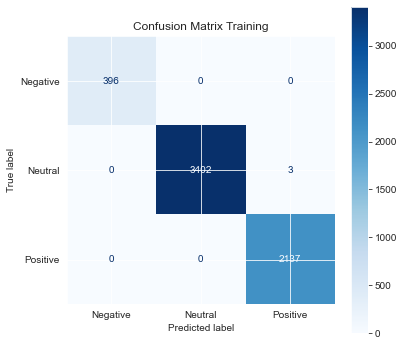

------------------------------------------------------------
Logistic Regression(Final Model) CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.59      0.29      0.39       148
     Neutral       0.93      0.97      0.95      1126
    Positive       0.84      0.87      0.85       706

    accuracy                           0.88      1980
   macro avg       0.79      0.71      0.73      1980
weighted avg       0.87      0.88      0.87      1980



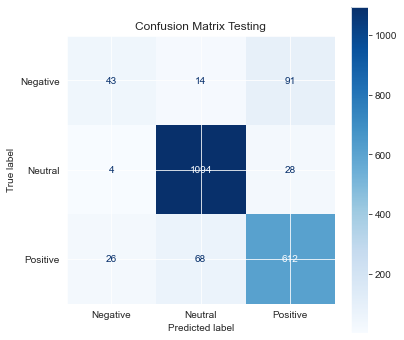

In [137]:
# classification report using function 
evaluate_classification(final_model,
                        X_train, 
                        X_test, 
                        y_train, 
                        y_test, 
                        label='Logistic Regression(Final Model)');

# Feature Importance

Feature selection is a process where you select those features in your data that contribute most to the prediction variable.

We will use permutation importance to evaluate the importance of the features. Permutation importance is calculated by the decrease in a model score when a single feature value is randomly shuffled. The decrease in the score suggests how much the model depends on the feature. Additionally, we specify the score function used to calculate the importance value to: f1_macro. This feature selection will only reflect the importance value of the features relative to our selected model: random forest classifier. [(documentation)](https://scikit-learn.org/stable/modules/permutation_importance.html)


In [73]:
# from sklearn documentation
# number of times a feature is randomly shuffled specified to: 30
features = permutation_importance(rf_pipe, 
                                 X_test, 
                                 y_test, 
                                 n_repeats=30, 
                                 scoring='f1_macro', 
                                 random_state=42)

In [74]:
# from sklearn documentation
# probing which features are most predictive
for i in features.importances_mean.argsort()[::-1]:
     if features.importances_mean[i] - 2 * features.importances_std[i] > 0:
         print(f"{X_test.columns[i]:<8}"
               f"{features.importances_mean[i]:.3f}"
               f" +/- {features.importances_std[i]:.3f}")

brand   0.307 +/- 0.011
clean_tweets0.060 +/- 0.002
stopword_count0.016 +/- 0.004
hashtags0.014 +/- 0.002
avg_wordlength0.013 +/- 0.004
stopwords_vs_words0.011 +/- 0.003
sent_count0.010 +/- 0.005
unique_word_count0.007 +/- 0.003
punct_count0.003 +/- 0.001


# Results

We can predict a tweet's sentiment with a logistic regression pipeline at an accuracy of 88% and macro f1 of 73%, and have determined which features of a tweet are most important in classifying sentiment. Our models with engineered features performed better than the same model without engineered features. The engineered features provided more data to our model, they helped it understand the tweet better. The engineered features helped the models understand the context that makes up a tweet. 

# Recommendations:

Google's Marketing & Communications team wants to improve their social media communications strategy ahead of an exciting launch. Specifically, Google wants a tool to help with:

    Improving customer satisfaction
    Improving marketing campaigns

Google can use this classification model to identify the emotion of tweets about a particular topic, the topic could be past launches, new products, or the brand itself. With Google's upcoming launch, Google can analyze the words, phrases, and hashtags of past launches by sentiment to better understand the audience's reception to the launch to help shape the strategy for the new launch. Equally, Google can use this model during the launch for real time feedback and after the launch to analyze for feedback. By classifying tweets into sentiment classes, Google will be able to extract more meaningful patterns with the help of word clouds and graphs. 

<b>Customer Satisfaction</b>

 - Google will be able to see which words, phrases, and hashtags are most associated with the positive and negative sentiments. For example, we are able to see that "launch" "circle" "social" "networking" are prominent words in the negative sentiment word cloud; it would be highly recommended to prevent a similar situation. The public seemed to express a lot of negative sentiment towards there being no launch for Google's social networking product. 
 - Additionally, Google can reach out directly to any specific concerns a consumer might have. By focusing on sentiment and focusing on the trending topics, Google can spend resources addressing the the more prominent issues that are publicly surfacing on Twitter. 
 - Google can look further into negative hashtags to analyze any ongoing issues. For example, The hashtag #bettersearch was prominent in the negative sentiment tweets. Google can look into what can be improved to change the negative sentiments being associated with #bettersearch.
 
<b>Marketing</b>

 - Google can see that there was high and positive anticipation for their circles launch. Google can assess the succesful strategies that were implemented to create positive anticipation for their next launch. 
 - Google can use this tool to monitor their competitiors. Google can analyze what the public is liking or disliking from their competitors. For example, Google can see that the public has been expressing negative sentiment towards Apple with the hashtag #batterykiller. Google can continue working on providing better battery performance and can highlight their battery performance in marketing campaigns. 
 - Google can also focus on what the public has expressed positive sentiment towards. With our model, Google can see that the public at the conference showed lots of positive sentiment towards Marissa Mayer's demo. Google can incorporate a favorable googler to their next launch to increase positive sentiment and engagemtn they can invite Marissa Mayer to their next launch since her name was present in many tweets of positive sentiment.

We've built a model that can efficiently classify tweets as positive, negative, or neutral sentiment to provide a better understanding of public opinion. Depending on the prominent trends, Google can use these meaningful and focused insights to develop strategies to increase customer satisfaction and strengthen marketing initiatives. 

# Next Steps

- Better data collection could significantly improve our prediction ability. We have an imbalanced dataset with majority "Neutral" sentiment values. More data, particularly for the minority classes could improve the model's performance. Additionally, some of the tweets were mislabeled, for next steps our model could benefit from training on more accurate labeled tweets.
- Include new data by web scraping tweets so that we are able to collect usernames of tweet poster and so that our model is able to train on newer and larger data.
- Use specific tweet tokenizer so that our model is able to handle emojis.
- Engineer additional features like assigning a sentiment intensity score to each tweet using nltk' vader package.
- Given the high weight the random forest algorithm gives to the hashtags feature, we should further inspect it for patterns.
- Use feature importance to improve our model, removing those features with lower scores. 